In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

In [2]:
import os
import cv2
from PIL import Image

In [3]:
train_path = '../input/chest-xray-pneumonia/chest_xray/train/'
val_path = '../input/chest-xray-pneumonia/chest_xray/val/'
test_path = '../input/chest-xray-pneumonia/chest_xray/test/'

In [53]:
import matplotlib.pyplot as plt
import numpy as np

In [83]:
train_para_dir =train_path + "/"+ 'PNEUMONIA'

In [77]:
dataset = []
label = []
parasitized_images = os.listdir(train_para_dir)

In [78]:
parasitized_images[0].split(".")[1]

'jpeg'

In [88]:
image = cv2.imread('../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1415_virus_2425.jpeg')

In [89]:
image = Image.fromarray(image)

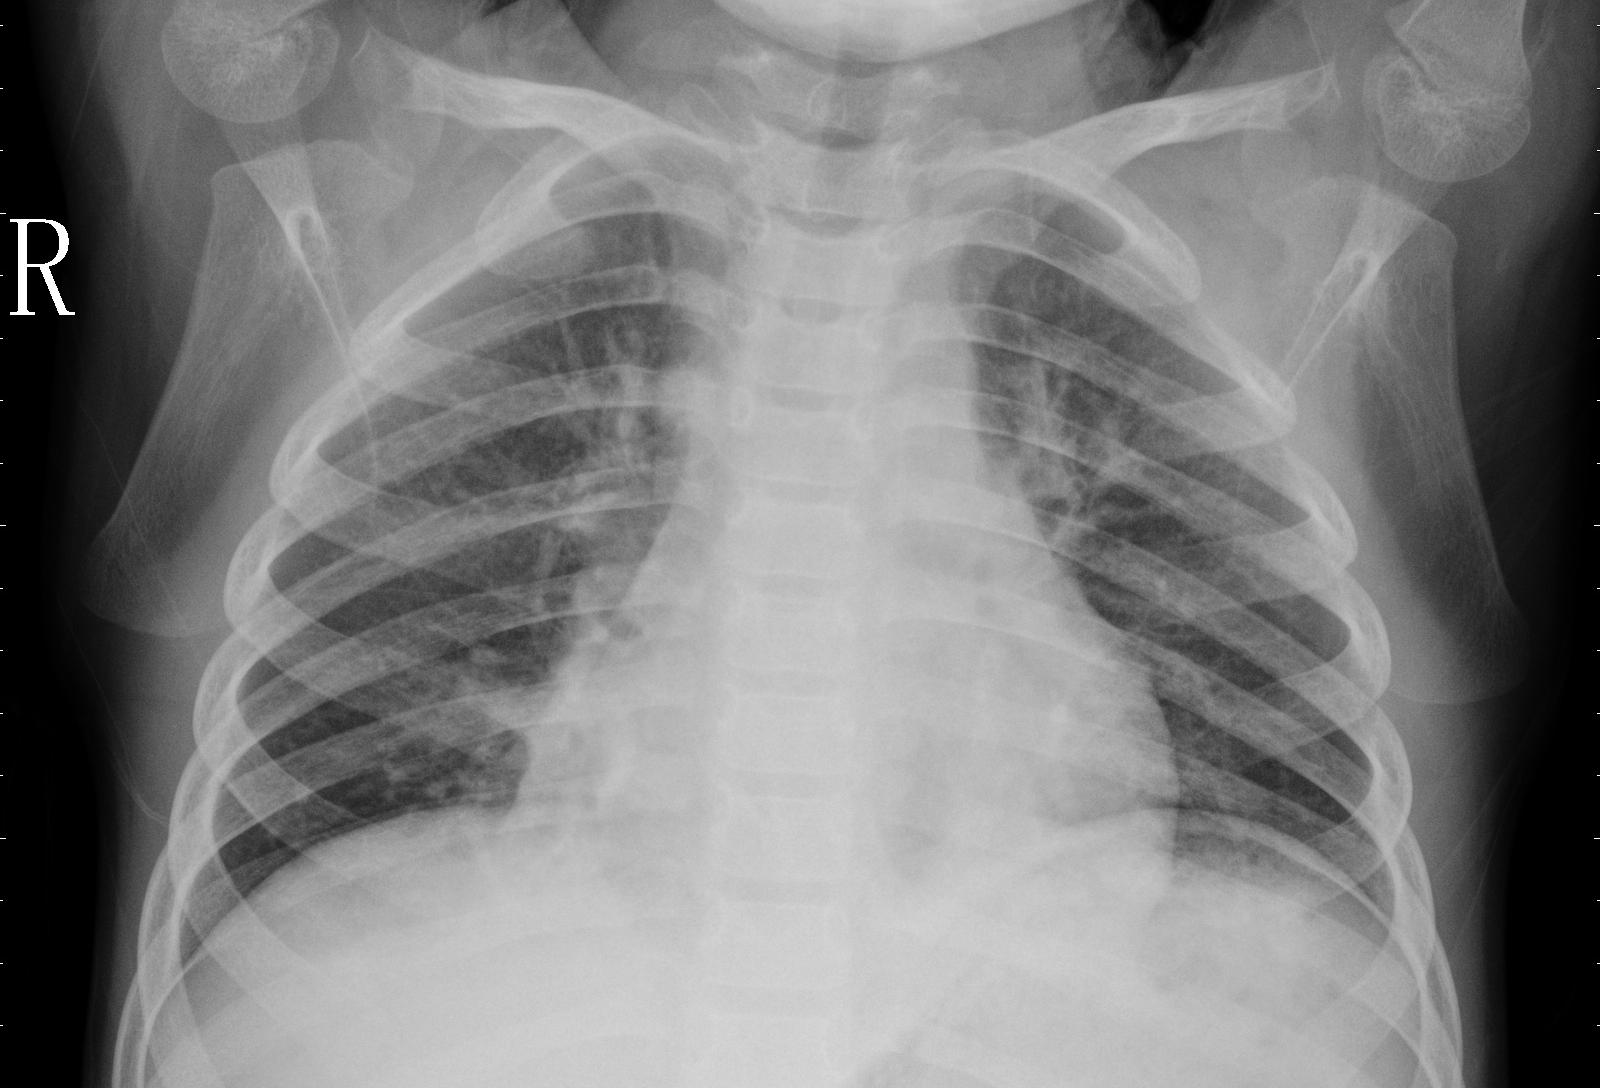

In [90]:
image

In [91]:
image = image.resize((64, 64))

In [94]:

for i, image_name in enumerate(parasitized_images):
    try:
         if (image_name.split('.')[-1] == 'jpeg'):
            print(train_para_dir+"/"+image_name)
            
            image = cv2.imread(train_para_dir+"/"+image_name)
            image = Image.fromarray(image)
            image = image.resize((64, 64))
            dataset.append(np.array(image))
            label.append(1)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1415_virus_2425.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person162_virus_319.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person400_virus_794.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person490_virus_996.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1710_bacteria_4526.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person110_virus_206.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person277_bacteria_1304.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person417_bacteria_1841.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1217_virus_2063.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1548_virus_2689.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1281_virus_2204.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person11

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person110_virus_205.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person540_bacteria_2271.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1551_bacteria_4053.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1496_virus_2606.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person564_bacteria_2344.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1539_virus_2678.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person334_bacteria_1544.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person757_virus_1385.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1038_virus_1733.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person949_bacteria_2874.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person296_bacteria_1391.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMON

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person306_bacteria_1440.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person667_virus_1252.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1376_bacteria_3511.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1111_bacteria_3052.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person364_bacteria_1660.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1602_bacteria_4218.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person337_bacteria_1563.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person536_virus_1065.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person445_virus_913.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person563_bacteria_2338.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person20_bacteria_67.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUM

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1638_bacteria_4341.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person671_virus_1260.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person457_bacteria_1949.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person770_virus_1398.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person939_bacteria_2864.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person269_virus_554.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person3_bacteria_10.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1351_virus_2330.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person392_virus_782.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1052_bacteria_2986.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1154_bacteria_3099.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/pe

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person97_virus_181.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person435_bacteria_1879.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person38_bacteria_196.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1409_bacteria_3583.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1320_bacteria_3348.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person44_bacteria_219.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person537_virus_1067.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1320_bacteria_3344.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person61_bacteria_291.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1375_bacteria_3510.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person71_bacteria_351.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMON

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1418_bacteria_3637.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person531_bacteria_2242.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person646_virus_1227.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1639_bacteria_4343.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person483_virus_985.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1493_bacteria_3896.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1312_bacteria_3314.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person582_bacteria_2404.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person744_bacteria_2647.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person297_bacteria_1400.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person262_virus_545.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PN

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person382_bacteria_1742.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1522_virus_2651.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person348_virus_720.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1590_bacteria_4174.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1684_bacteria_4461.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1433_bacteria_3705.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1735_bacteria_4570.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1016_virus_1704.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person54_bacteria_257.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person896_virus_1548.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person138_virus_282.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONI

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1158_virus_1940.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person375_virus_758.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person51_bacteria_247.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person576_virus_1120.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person335_virus_690.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person337_bacteria_1554.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person870_virus_1516.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1323_bacteria_3362.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person799_virus_1431.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1644_bacteria_4358.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person333_bacteria_1539.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/pers

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person255_bacteria_1182.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person474_virus_971.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person370_bacteria_1689.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person855_virus_1500.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1590_bacteria_4175.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1036_bacteria_2970.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person674_bacteria_2568.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1516_virus_2643.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person699_bacteria_2598.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1507_bacteria_3945.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person583_bacteria_2409.jpeg
../input/chest-xray-pneumonia/chest_xray/train//P

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person302_bacteria_1430.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1182_virus_2017.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1562_bacteria_4087.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person353_virus_728.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person459_virus_947.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person59_bacteria_280.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person321_bacteria_1489.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person610_virus_1177.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1445_bacteria_3734.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person588_virus_1135.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1803_bacteria_4651.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person876_bacteria_2799.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person347_bacteria_1595.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1239_bacteria_3195.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1340_virus_2312.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1358_bacteria_3465.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person321_bacteria_1483.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person363_bacteria_1654.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1107_virus_1831.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person557_bacteria_2327.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person258_bacteria_1210.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person267_bacteria_1250.jpeg
../input/chest-xray-pneumonia/chest_xray/trai

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person936_bacteria_2861.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person351_bacteria_1622.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person465_bacteria_1976.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1060_virus_1760.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1372_bacteria_3499.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1314_virus_2269.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1545_bacteria_4042.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1310_bacteria_3302.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person280_virus_577.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person388_virus_777.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1072_virus_1775.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMO

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1380_bacteria_3515.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person504_bacteria_2127.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person366_virus_746.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person360_virus_739.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person446_bacteria_1931.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person396_virus_789.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person54_bacteria_258.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1323_virus_2282.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person382_bacteria_1740.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person343_virus_704.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person359_bacteria_1643.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/pers

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person340_bacteria_1575.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person336_bacteria_1548.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person350_virus_725.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1502_bacteria_3925.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person762_virus_1390.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person873_bacteria_2796.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person487_bacteria_2055.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person299_bacteria_1417.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person23_bacteria_103.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1489_bacteria_3889.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person647_virus_1229.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUM

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person128_virus_261.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1592_virus_2766.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1268_bacteria_3228.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person573_bacteria_2369.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person46_bacteria_224.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person472_bacteria_2015.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1070_virus_1773.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1639_bacteria_4347.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1041_bacteria_2975.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person765_virus_1393.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1472_bacteria_3834.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEU

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1059_bacteria_2993.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1481_bacteria_3863.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1935_bacteria_4850.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person600_bacteria_2457.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person361_virus_740.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1351_bacteria_3441.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1141_bacteria_3085.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1285_virus_2208.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person552_virus_1092.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1463_bacteria_3809.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person492_virus_998.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PN

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person534_bacteria_2253.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person41_bacteria_208.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person62_bacteria_301.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person36_bacteria_185.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person487_bacteria_2060.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person81_virus_152.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1536_bacteria_4018.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person783_bacteria_2687.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person789_bacteria_2694.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person534_bacteria_2254.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1812_bacteria_4667.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEU

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person475_bacteria_2020.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1213_virus_2058.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person622_bacteria_2494.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1502_bacteria_3923.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1367_virus_2351.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1180_virus_2015.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person528_virus_1049.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person521_virus_1040.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person448_bacteria_1935.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1503_virus_2613.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person321_bacteria_1485.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONI

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person112_virus_213.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person399_virus_793.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person326_bacteria_1507.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person768_bacteria_2672.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person981_bacteria_2907.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person601_bacteria_2459.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person308_virus_630.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person318_virus_644.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1680_bacteria_4455.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person550_bacteria_2308.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1528_bacteria_3996.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person480_bacteria_2038.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person535_bacteria_2256.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person309_bacteria_1447.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1482_bacteria_3874.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person462_virus_951.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person413_bacteria_1833.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person978_virus_1653.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1180_virus_2009.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1619_bacteria_4269.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person337_bacteria_1562.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1405_bacteria_3566.jpeg
../input/chest-xray-pneumonia/chest_xray/train//P

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1613_bacteria_4247.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person337_bacteria_1561.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1499_virus_2609.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1115_virus_1840.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person359_bacteria_1645.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person774_virus_1403.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person741_bacteria_2644.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person261_virus_543.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1420_virus_2431.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person3_bacteria_13.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1595_bacteria_4183.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person562_bacteria_2332.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person486_bacteria_2054.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person605_bacteria_2464.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person376_bacteria_1715.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person583_bacteria_2408.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1409_bacteria_3585.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person331_bacteria_1529.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1719_bacteria_4542.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person419_bacteria_1844.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1292_bacteria_3255.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person525_bacteria_2220.jpeg
../input/chest-xray-pneumonia/chest_xray

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person281_bacteria_1323.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1454_bacteria_3779.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1753_bacteria_4594.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person441_bacteria_1902.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person119_virus_225.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1457_virus_2498.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person479_virus_978.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person277_bacteria_1300.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person32_bacteria_166.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person81_virus_153.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person586_bacteria_2417.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person801_virus_1434.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1076_bacteria_3016.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person30_bacteria_155.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person71_bacteria_350.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1907_bacteria_4806.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person996_bacteria_2924.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person263_virus_546.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person718_bacteria_2620.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person337_bacteria_1557.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person268_virus_553.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person590_bacteria_2428.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONI

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1502_bacteria_3922.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person493_bacteria_2087.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person264_bacteria_1230.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1468_virus_2545.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1509_bacteria_3951.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person862_bacteria_2784.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1338_bacteria_3397.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person59_bacteria_282.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person348_virus_714.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1944_bacteria_4869.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1413_bacteria_3613.jpeg
../input/chest-xray-pneumonia/chest_xray/train

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person61_bacteria_294.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person258_virus_539.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person811_virus_1447.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1481_virus_2567.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person465_bacteria_1980.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person853_virus_1498.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person798_virus_1430.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person506_virus_1018.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1657_bacteria_4399.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person280_bacteria_1320.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1454_virus_2486.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person536_bacteria_2260.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1438_bacteria_3715.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person501_bacteria_2114.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person331_bacteria_1528.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person598_virus_1153.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person995_bacteria_2923.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person604_bacteria_2462.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person349_bacteria_1607.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person315_bacteria_1465.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1504_virus_2614.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person56_bacteria_267.jpeg
../input/chest-xray-pneumonia/chest_xray/train//P

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person95_virus_177.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1453_bacteria_3772.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person795_virus_1427.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1320_bacteria_3350.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1636_bacteria_4337.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1175_virus_1981.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person477_bacteria_2029.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person986_bacteria_2913.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person410_virus_821.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1916_bacteria_4821.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person392_bacteria_1784.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUM

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person771_virus_1399.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person113_virus_215.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person392_bacteria_1786.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person99_virus_183.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person829_bacteria_2740.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1179_virus_2006.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1258_virus_2138.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person680_bacteria_2575.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person133_virus_267.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person384_virus_769.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person588_virus_1134.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person320_vi

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person346_bacteria_1590.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person20_bacteria_70.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1641_bacteria_4350.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person370_bacteria_1692.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person73_bacteria_356.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person124_virus_240.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person458_virus_945.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person658_virus_1241.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person55_bacteria_260.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person437_virus_888.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1385_virus_2380.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person27

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person701_bacteria_2600.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1728_bacteria_4555.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person351_bacteria_1617.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1065_bacteria_2999.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person837_bacteria_2754.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1327_bacteria_3374.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person894_bacteria_2819.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1074_bacteria_3012.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person338_virus_694.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1460_virus_2507.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person284_virus_582.jpeg
../input/chest-xray-pneumonia/chest_xray/train//P

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1145_virus_1905.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person438_bacteria_1892.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person563_bacteria_2340.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person714_bacteria_2615.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person448_bacteria_1936.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person41_bacteria_209.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1467_virus_2544.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person38_bacteria_190.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1203_bacteria_3154.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person341_bacteria_1577.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person51_bacteria_243.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEU

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person477_bacteria_2031.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person690_bacteria_2587.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person504_bacteria_2133.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1670_bacteria_4429.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1506_virus_2616.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person579_virus_1123.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person522_bacteria_2210.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person30_bacteria_146.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person529_bacteria_2228.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person489_bacteria_2066.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person321_bacteria_1484.jpeg
../input/chest-xray-pneumonia/chest_xray/train//P

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person47_bacteria_229.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person450_bacteria_1941.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person313_bacteria_1459.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person574_bacteria_2372.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person382_bacteria_1739.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1598_bacteria_4195.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person23_bacteria_84.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person300_bacteria_1423.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person861_virus_1506.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person571_virus_1114.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person403_virus_803.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person407_bacteria_1822.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1598_bacteria_4197.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person605_bacteria_2468.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person788_virus_1419.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1272_virus_2190.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1058_bacteria_2992.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person465_bacteria_1982.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1188_bacteria_3137.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1938_bacteria_4854.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1069_bacteria_3003.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person145_virus_295.jpeg
../input/chest-xray-pneumonia/chest_xray/train/

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person124_virus_233.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1077_bacteria_3017.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person102_virus_189.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person963_virus_1636.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1062_bacteria_2996.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1359_virus_2340.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person292_virus_597.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1921_bacteria_4828.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person123_virus_230.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person387_bacteria_1769.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1084_virus_1796.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/perso

../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person767_bacteria_2671.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person298_bacteria_1408.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person723_virus_1342.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person890_virus_1540.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person613_bacteria_2479.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person641_virus_1222.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person630_bacteria_2512.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1860_bacteria_4732.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person469_bacteria_1993.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person1313_bacteria_3320.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PNEUMONIA/person469_bacteria_1992.jpeg
../input/chest-xray-pneumonia/chest_xray/train//PN

In [95]:
non_parasitized_images = os.listdir(train_path + "/"+"NORMAL")
for i, image_name in enumerate(non_parasitized_images):
    try:
        if (image_name.split('.')[-1] == 'jpeg'):
            image = cv2.imread(train_path + "/"+"NORMAL"+"/"+image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((64, 64))
            dataset.append(np.array(image))
            label.append(0)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

In [ ]:
non_parasitized_images = os.listdir(train_path + "/"+"NORMAL")
for i, image_name in enumerate(non_parasitized_images):
    try:
        if (image_name.split('.')[-1] == 'jpeg'):
            image = cv2.imread(train_path + "/"+"NORMAL"+"/"+image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((64, 64))
            dataset.append(np.array(image))
            label.append(0)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

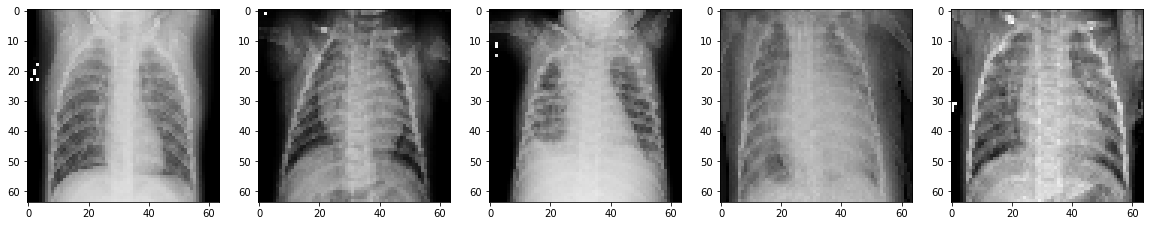

In [96]:
plt.figure(figsize = (20, 12))

for i , image_index in enumerate(np.random.randint(len(parasitized_images),size=5)):
  plt.subplot(1,5,i  + 1)
  plt.imshow(dataset[image_index])

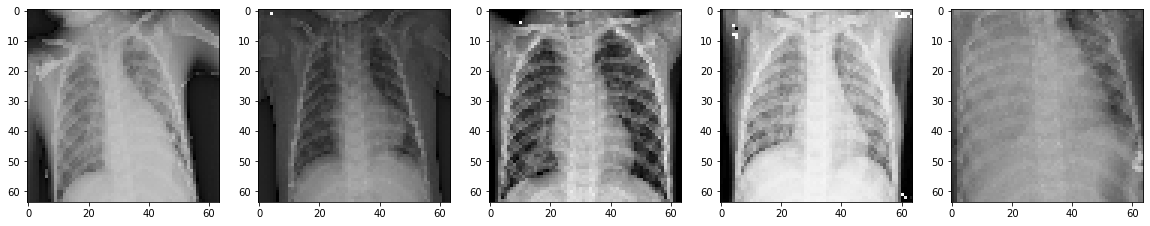

In [97]:
plt.figure(figsize = (20, 12))

for i , image_index in enumerate(np.random.randint(len(non_parasitized_images),size=5)):
  plt.subplot(1,5,i  + 1)
  plt.imshow(dataset[image_index])

In [100]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rescale=1/255,
                                zoom_range = 0.3,
                                horizontal_flip = True,
                                rotation_range = 30)
test_generator = ImageDataGenerator(rescale = 1/255)
val_generator = ImageDataGenerator(rescale = 1/255)

In [101]:
train_generator = train_generator.flow_from_directory(
        train_path ,
        target_size=(64,64),
        batch_size=32,
        class_mode='binary',shuffle=True)
val_generator = val_generator.flow_from_directory(
        val_path ,
        target_size=(64,64),
        batch_size=64,
        shuffle=False)
test_generator = test_generator.flow_from_directory(
        test_path ,
        target_size=(64,64),
        batch_size=64,
        shuffle=False)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [133]:
classifier = None
classifier = Sequential()
#Convolutional layer 1
classifier.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(BatchNormalization(axis=-1))
classifier.add(Dropout(0.2))

#Convolutional layer 2
classifier.add(Convolution2D(32,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(BatchNormalization(axis=-1))
classifier.add(Dropout(0.2))


classifier.add(Flatten())

#Dense Layer 1
classifier.add(Dense(activation = 'relu', units=512))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))

#Dense Layer 2
classifier.add(Dense(activation='relu',units=256))
classifier.add(BatchNormalization(axis=-1))
classifier.add(Dropout(0.2))

#Final Output Layer
classifier.add(Dense(activation='sigmoid',units=2))

classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [134]:
classifier.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_44 (Batc (None, 31, 31, 32)        128       
_________________________________________________________________
dropout_48 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_45 (Batc (None, 14, 14, 32)      

In [158]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(dataset,to_categorical(np.array(label)),test_size=0.2,random_state=1)

In [157]:
y_train.shape,y_test.shape

((4172, 2), (1044, 2))

In [132]:
history = classifier.fit(np.array(X_train),y_train,batch_size=64,verbose=2,epochs=25,validation_data=(np.array(X_test),y_test),shuffle=False)

Epoch 1/25
66/66 - 1s - loss: 0.2081 - accuracy: 0.9379 - val_loss: 7.6485 - val_accuracy: 0.2883
Epoch 2/25
66/66 - 1s - loss: 0.0825 - accuracy: 0.9770 - val_loss: 4.0896 - val_accuracy: 0.3774
Epoch 3/25
66/66 - 1s - loss: 0.0562 - accuracy: 0.9837 - val_loss: 0.7284 - val_accuracy: 0.8151
Epoch 4/25
66/66 - 1s - loss: 0.0503 - accuracy: 0.9837 - val_loss: 0.0779 - val_accuracy: 0.9741
Epoch 5/25
66/66 - 1s - loss: 0.0331 - accuracy: 0.9892 - val_loss: 0.0873 - val_accuracy: 0.9770
Epoch 6/25
66/66 - 1s - loss: 0.0263 - accuracy: 0.9914 - val_loss: 1.4190 - val_accuracy: 0.7768
Epoch 7/25
66/66 - 1s - loss: 0.0321 - accuracy: 0.9897 - val_loss: 1.2248 - val_accuracy: 0.7797
Epoch 8/25
66/66 - 1s - loss: 0.0264 - accuracy: 0.9916 - val_loss: 1.4437 - val_accuracy: 0.7605
Epoch 9/25
66/66 - 0s - loss: 0.0336 - accuracy: 0.9875 - val_loss: 0.2426 - val_accuracy: 0.9320
Epoch 10/25
66/66 - 1s - loss: 0.0222 - accuracy: 0.9933 - val_loss: 0.1677 - val_accuracy: 0.9636
Epoch 11/25
66/66 -

In [127]:
y_pred =classifier.predict(np.array(X_test))

In [142]:
y_test = [np.argmax(x) for x in y_test ]

In [143]:
y_test

[1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,


In [144]:
y_pred  = [np.argmax(x)for x in y_pred]

In [145]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9099616858237548

**Use Transfer Learning**

In [146]:
from tensorflow.keras.applications.vgg16 import VGG16

In [147]:
convolution_base = VGG16(weights='imagenet',include_top=False,input_shape=(64,64,3))
for layer in convolution_base.layers:
  layer.trainable = False

In [148]:
model = Sequential()
model.add(convolution_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten_13 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dense_43 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_52 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_53 (Dropout)         (None, 128)             

In [150]:

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=2e-5),
              metrics=['accuracy'])

In [159]:
history = classifier.fit(np.array(X_train),y_train,epochs=15,validation_data=(np.array(X_test),y_test))

Epoch 1/15
131/131 [==============================] - 1s 8ms/step - loss: 0.0833 - accuracy: 0.9727 - val_loss: 1.0088 - val_accuracy: 0.7787
Epoch 2/15
131/131 [==============================] - 1s 7ms/step - loss: 0.0723 - accuracy: 0.9760 - val_loss: 0.1955 - val_accuracy: 0.9330
Epoch 3/15
131/131 [==============================] - 1s 7ms/step - loss: 0.0468 - accuracy: 0.9851 - val_loss: 0.3339 - val_accuracy: 0.9061
Epoch 4/15
131/131 [==============================] - 1s 7ms/step - loss: 0.0666 - accuracy: 0.9763 - val_loss: 0.1778 - val_accuracy: 0.9262
Epoch 5/15
131/131 [==============================] - 1s 7ms/step - loss: 0.0670 - accuracy: 0.9787 - val_loss: 0.4018 - val_accuracy: 0.8736
Epoch 6/15
131/131 [==============================] - 1s 7ms/step - loss: 0.0377 - accuracy: 0.9878 - val_loss: 0.1123 - val_accuracy: 0.9665
Epoch 7/15
131/131 [==============================] - 1s 7ms/step - loss: 0.0420 - accuracy: 0.9854 - val_loss: 0.5980 - val_accuracy: 0.8544
Epoch 

Transfer Learning gave a better accuracy

# Visualize training accuracy vs validation accuracy

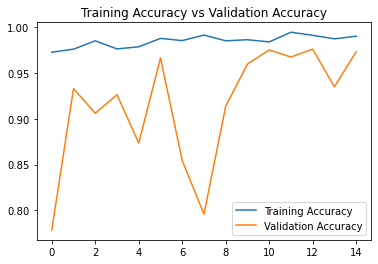

In [176]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.legend()
plt.show()

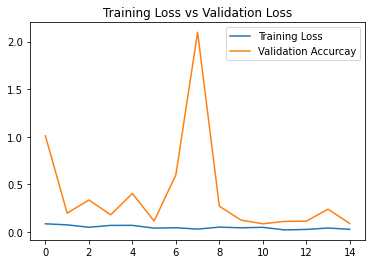

In [177]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Accurcay')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.show()

In [161]:
test_path

'../input/chest-xray-pneumonia/chest_xray/test/'

In [169]:
test_images_normal = os.listdir(test_path +"NORMAL/")

In [173]:
test_images_normal = os.listdir(test_path +"NORMAL/")
test_data =[]
test_label = []
                                
for i, image_name in enumerate(test_images_normal):
    #print(image_name.split('.')[-1])
    try:
        if (image_name.split('.')[-1] == 'jpeg'):
            #print(test_images_normal + image_name)
            image = cv2.imread(test_path +"NORMAL/"+image_name)
            image = Image.fromarray(image)
            image = image.resize((64, 64))
            test_data.append(np.array(image))
            test_label.append(0)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

In [184]:
test_images_abnormal = os.listdir(test_path +"PNEUMONIA/")

In [186]:
for i, image_name in enumerate(test_images_abnormal):
    #print(image_name.split('.')[-1])
    try:
        if (image_name.split('.')[-1] == 'jpeg'):
            #print(test_images_normal + image_name)
            image = cv2.imread(test_path +"PNEUMONIA/"+image_name)
            image = Image.fromarray(image)
            image = image.resize((64, 64))
            test_data.append(np.array(image))
            test_label.append(1)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

In [187]:
test_data[0].shape

(64, 64, 3)

In [188]:
len(test_data)

624

In [189]:
y_test_pred = classifier.predict(np.array(test_data))

In [190]:
y_test_pred = [np.argmax(x) for x in y_test_pred]

In [191]:
accuracy_score(test_label,y_test_pred)

0.7692307692307693

**Accuracy on test data : 76%**